In [59]:
#Diamond Quality Prediction

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")
import pydotplus
import random
import gspread
from gspread_dataframe import get_as_dataframe,set_with_dataframe

In [61]:
import gspread

GSHEET_NAME = 'DiamondsData'
TAB_NAME = 'Diamond'

def get_sheet_data(GSHEET_NAME,TAB_NAME):
    gc = gspread.service_account(filename = "diamond-analysis-ac6758ca1ace.json")
    sh = gc.open(GSHEET_NAME)
    worksheet = sh.worksheet(TAB_NAME)
    df = pd.DataFrame(worksheet.get_all_records())
    return df
dataset = get_sheet_data(GSHEET_NAME,TAB_NAME)
dataset

,diamond_id,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,660361947,Radiant,12.96,E,Other,Orange,Greenish,Fancy Light,I3,Good,...,STK,STK,M,Green,Green,Very Slight,GIA,1447020,Yes,2022-02-02
1,397295362,Round,9.24,M,Blue,Purple,Greenish,Very Light,VVS1,Fair,...,XTK,STK,VL,Blue,Green,Very Slight,GIA,713124,Borderline,2007-06-30
2,398442081,Cushion Modified,18.14,J,Yellow,Chameleon,Grayish,Fancy Intense,SI2,Fair,...,TN,VTK,M,Yellow,Orange,Faint,GIA,983371,Yes,2005-04-04
3,842098774,Radiant,10.05,K,Gray,Purple,Yellowish,Fancy,VVS2,Poor,...,XTK,VTN,S,Blue,Yellow,Faint,IGI,547967,No,2017-06-10
4,167689537,Princess,10.38,I,Red,Orange,Yellowish,Fancy Deep,VVS1,Poor,...,STN,TK,L,Green,Green,Very Strong,IGI,511021,Yes,2013-11-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,535170819,Round,11.96,H,Black,Other,Pinkish,Fancy Dark,VVS1,Good,...,VTN,XTN,VS,Orange,Orange,Slight,IGI,216930,Yes,2009-09-26
496,493068093,Marquise,9.11,H,Orange,Purple,Greenish,Very Light,VVS2,Excellent,...,TK,XTK,SL,Orange,Yellow,Very Strong,HRD,638895,E1,2007-03-27
497,988759238,Cushion Modified,16.05,M,Gray,Purple,Brownish,Fancy Light,SI3,Good,...,STN,TK,EL,Yellow,Orange,Faint,GIA,1153237,Borderline,2010-08-13
498,719612779,Round,9.03,M,Chameleon,Orange,Purplish,Light,VS1,Fair,...,TK,TK,VL,Yellow,Orange,Strong,GIA,1358941,E1,2003-10-13


In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   diamond_id                   500 non-null    int64  
 1   shape                        500 non-null    object 
 2   size                         500 non-null    float64
 3   color                        500 non-null    object 
 4   fancy_color_dominant_color   500 non-null    object 
 5   fancy_color_secondary_color  500 non-null    object 
 6   fancy_color_overtone         500 non-null    object 
 7   fancy_color_intensity        500 non-null    object 
 8   clarity                      500 non-null    object 
 9   cut                          500 non-null    object 
 10  symmetry                     500 non-null    object 
 11  polish                       500 non-null    object 
 12  depth_percent                500 non-null    float64
 13  table_percent       

In [63]:
dataset.head(10)

,diamond_id,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,660361947,Radiant,12.96,E,Other,Orange,Greenish,Fancy Light,I3,Good,...,STK,STK,M,Green,Green,Very Slight,GIA,1447020,Yes,2022-02-02
1,397295362,Round,9.24,M,Blue,Purple,Greenish,Very Light,VVS1,Fair,...,XTK,STK,VL,Blue,Green,Very Slight,GIA,713124,Borderline,2007-06-30
2,398442081,Cushion Modified,18.14,J,Yellow,Chameleon,Grayish,Fancy Intense,SI2,Fair,...,TN,VTK,M,Yellow,Orange,Faint,GIA,983371,Yes,2005-04-04
3,842098774,Radiant,10.05,K,Gray,Purple,Yellowish,Fancy,VVS2,Poor,...,XTK,VTN,S,Blue,Yellow,Faint,IGI,547967,No,2017-06-10
4,167689537,Princess,10.38,I,Red,Orange,Yellowish,Fancy Deep,VVS1,Poor,...,STN,TK,L,Green,Green,Very Strong,IGI,511021,Yes,2013-11-18
5,860757441,Cushion Modified,7.58,K,Other,Yellow,Orangey,Fancy Dark,VS2,Very Good,...,XTK,TN,VL,White,White,Strong,HRD,1277248,No,2007-06-29
6,106098173,Heart,0.63,K,Pink,Blue,Pinkish,Fancy Light,VVS1,Poor,...,STN,TN,M,Green,Yellow,Medium,HRD,931886,Yes,2007-09-03
7,112668860,Emerald,9.73,K,Blue,Other,Greenish,Light,I2,Poor,...,STK,TK,SL,Blue,Orange,Very Slight,IGI,1404996,Borderline,2015-08-03
8,230786950,Round,8.55,G,Green,Other,Greenish,Fancy Dark,VVS1,Very Good,...,TK,TK,SL,Yellow,Yellow,Strong,IGI,45347,Borderline,2022-09-06
9,445627739,Emerald,13.06,L,Green,Blue,Greenish,Very Light,IF,Excellent,...,STK,M,SL,Blue,Orange,Very Slight,HRD,994617,No,2004-11-26


In [64]:
dataset.to_csv("diamonds.csv",index = False)

In [65]:
dataset['shape'].unique()

array(['Radiant', 'Round', 'Cushion Modified', 'Princess', 'Heart',
       'Emerald', 'Pear', 'Cushion', 'Oval', 'Marquise', 'Asscher'],
      dtype=object)

### Data Preprocessing

In [66]:
dataset.isnull().sum()

diamond_id                     0
shape                          0
size                           0
color                          0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
clarity                        0
cut                            0
symmetry                       0
polish                         0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
culet_size                     0
culet_condition                0
fluor_color                    0
fluor_intensity                0
lab                            0
total_sales_price              0
eye_clean                      0
date                           0
dtype: int64

### Exploratory Data Analysis

### Questions
#### 1) How many shapes are available under each type

In [67]:
shape_count = dataset['shape'].value_counts()
shape_countDF = pd.DataFrame(shape_count)
shape_countDF

,count
shape,
Princess,54
Round,53
Pear,51
Cushion Modified,49
Heart,49
Emerald,43
Cushion,42
Oval,42
Marquise,41


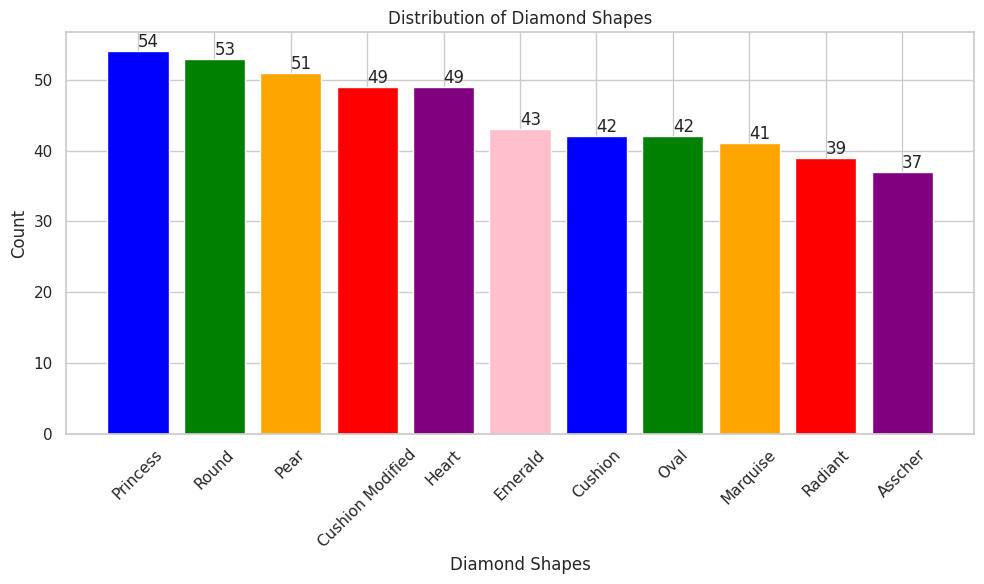

In [68]:
shape_countDF.reset_index(inplace=True)
shape_countDF.columns = ['Shape', 'Count']

# Define custom colors for the bars
colors = ['blue', 'green', 'orange', 'red', 'purple', 'pink']

# Plotting a bar chart with labels and colors
plt.figure(figsize=(10, 6))
bars = plt.bar(shape_countDF['Shape'], shape_countDF['Count'], color=colors)
plt.xlabel('Diamond Shapes')
plt.ylabel('Count')
plt.title('Distribution of Diamond Shapes')
plt.xticks(rotation=45)

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

plt.tight_layout()
plt.show()

#### 2) What is the size distribution

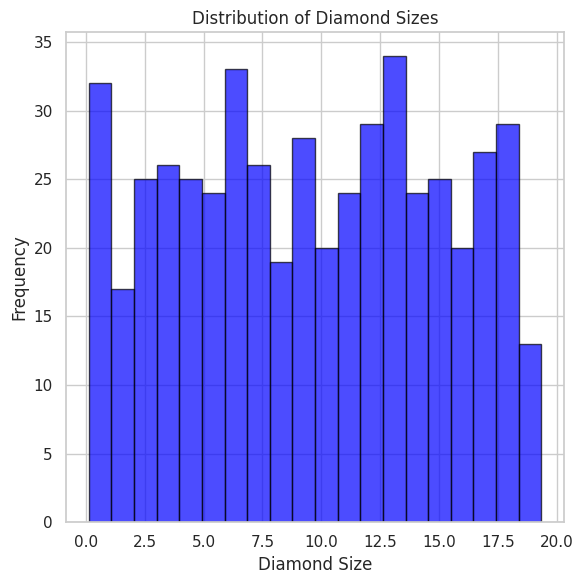

In [69]:
plt.figure(figsize=(6, 6))
plt.hist(dataset['size'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Diamond Size')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Sizes')
plt.tight_layout()
plt.show()

#### 3) What is the count of colors present

In [70]:
color = dataset['color'].value_counts()
colorDF = pd.DataFrame(color)
colorDF

,count
color,
D,60
E,59
M,56
I,54
K,49
L,49
J,48
H,46
F,43


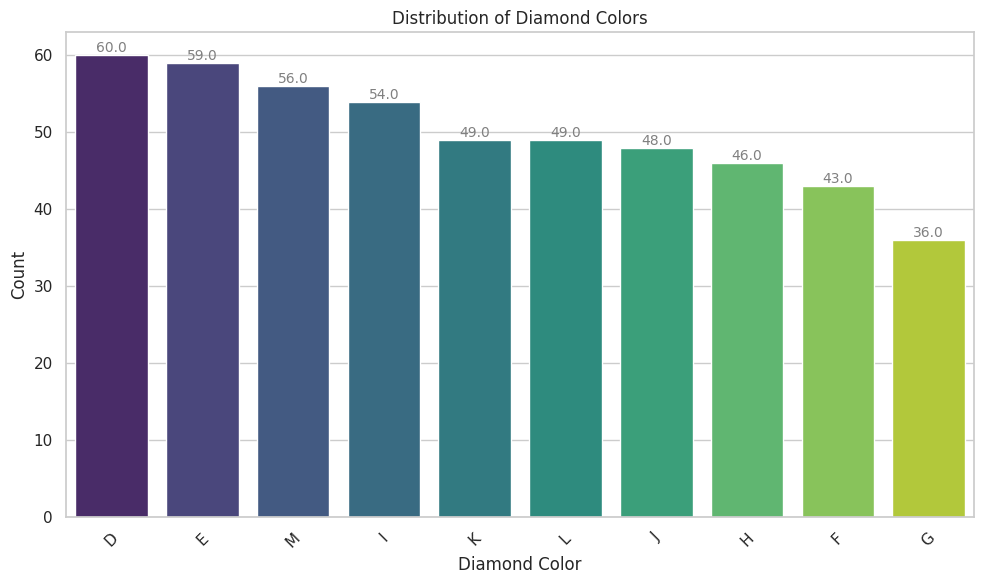

In [71]:
colorDF = pd.DataFrame(color)

# Reset the index to have the color names as a column
colorDF.reset_index(inplace=True)
colorDF.columns = ['Color', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a bar graph using seaborn with bar labels
plt.figure(figsize=(10, 6))
ax = sn.barplot(x='Color', y='Count', data=colorDF, palette="viridis")
plt.xlabel('Diamond Color')
plt.ylabel('Count')
plt.title('Distribution of Diamond Colors')

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4) To show fancy color distribution

In [72]:
fcolor_dist = dataset['fancy_color_dominant_color'].value_counts()
fcolor_distDF = pd.DataFrame(fcolor_dist)
fcolor_distDF

,count
fancy_color_dominant_color,
Black,51
Orange,48
Other,44
Pink,44
Purple,44
Red,43
Green,42
Yellow,41
Gray,41


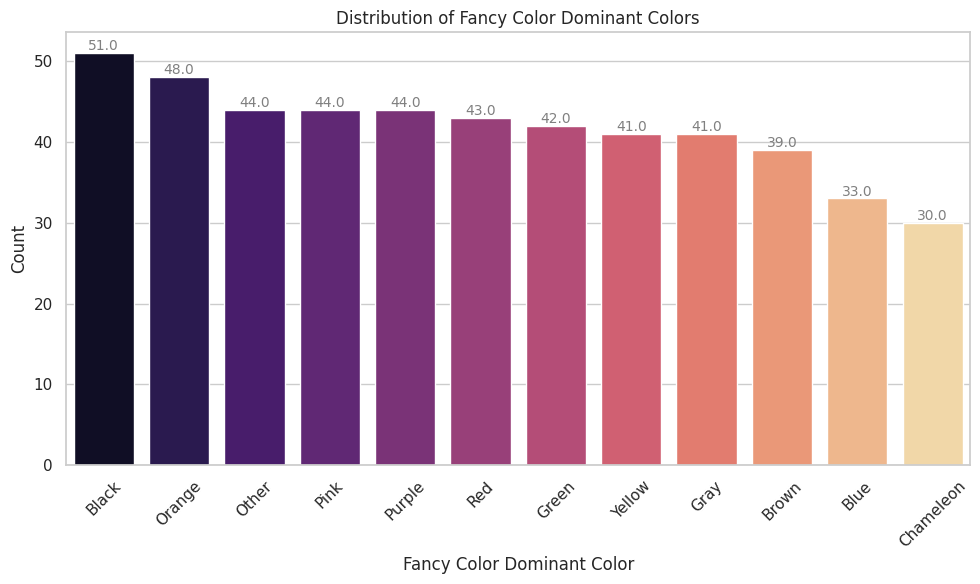

In [73]:
fcolor_distDF = pd.DataFrame(fcolor_dist)

# Reset the index to have the fancy color names as a column
fcolor_distDF.reset_index(inplace=True)
fcolor_distDF.columns = ['Fancy Color', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a bar graph using seaborn with bar labels
plt.figure(figsize=(10, 6))
ax = sn.barplot(x='Fancy Color', y='Count', data=fcolor_distDF, palette="magma")
plt.xlabel('Fancy Color Dominant Color')
plt.ylabel('Count')
plt.title('Distribution of Fancy Color Dominant Colors')

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 5) To show fancy_color_overtone distribution

In [74]:
overtone = dataset['fancy_color_overtone'].value_counts()
overtoneDF = pd.DataFrame(overtone)
overtoneDF

,count
fancy_color_overtone,
Brownish,92
Orangey,78
Yellowish,77
Grayish,69
Greenish,66
Purplish,65
Pinkish,53


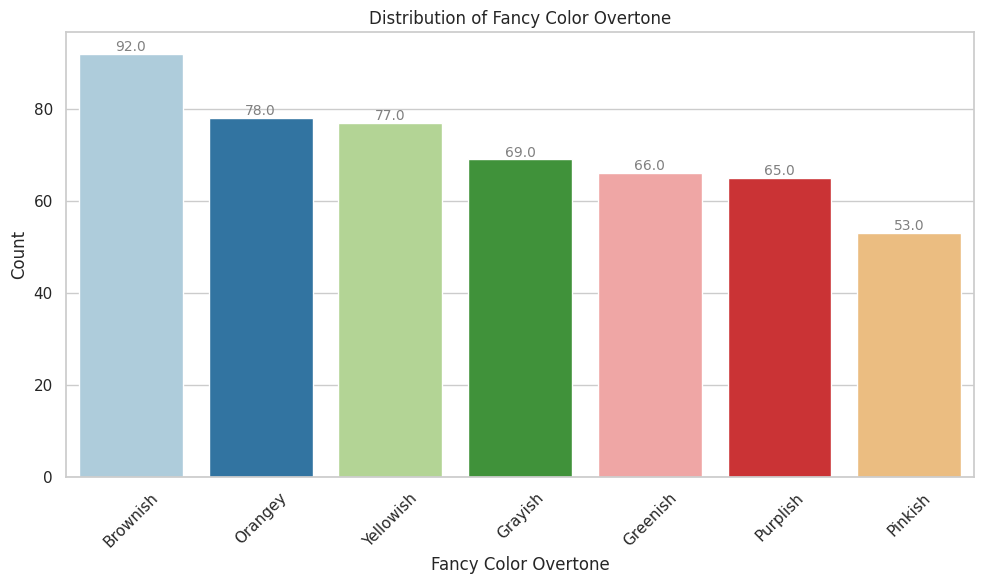

In [75]:
overtoneDF = pd.DataFrame(overtone)

# Reset the index to have the overtone names as a column
overtoneDF.reset_index(inplace=True)
overtoneDF.columns = ['Overtone', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a bar graph using seaborn with bar labels
plt.figure(figsize=(10, 6))
ax = sn.barplot(x='Overtone', y='Count', data=overtoneDF, palette="Paired")
plt.xlabel('Fancy Color Overtone')
plt.ylabel('Count')
plt.title('Distribution of Fancy Color Overtone')

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 6) To show fancy_color_intensity distribution

In [76]:
intensity = dataset['fancy_color_intensity'].value_counts()
intensityDF = pd.DataFrame(intensity)
intensityDF

,count
fancy_color_intensity,
Fancy Deep,71
Fancy,68
Fancy Light,62
Very Light,59
Light,56
Fancy Intense,53
Fancy Dark,49
Faint,42
Fancy Vivid,40


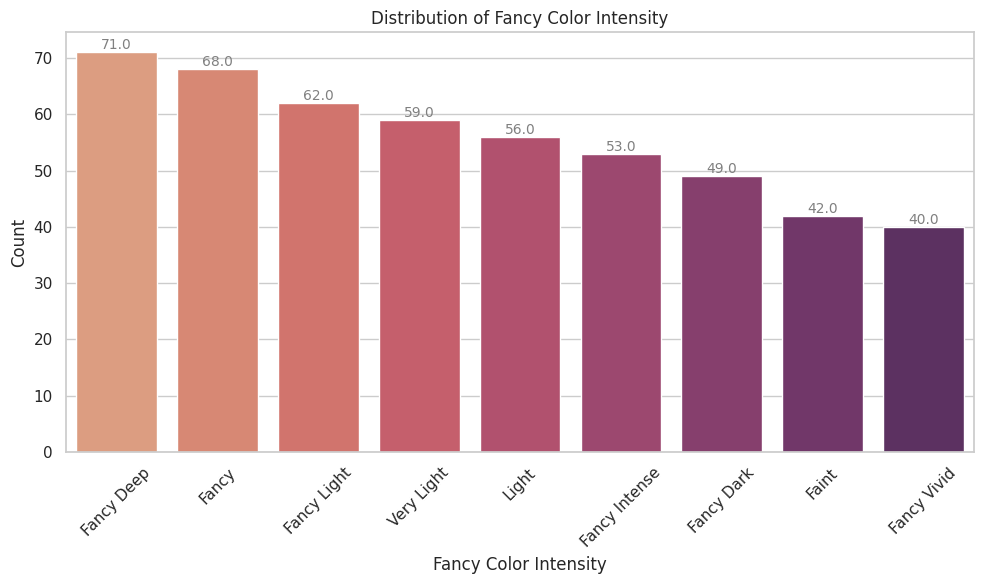

In [77]:
intensityDF = pd.DataFrame(intensity)

# Reset the index to have the intensity levels as a column
intensityDF.reset_index(inplace=True)
intensityDF.columns = ['Intensity', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a bar graph using seaborn with bar labels
plt.figure(figsize=(10, 6))
ax = sn.barplot(x='Intensity', y='Count', data=intensityDF, palette="flare")
plt.xlabel('Fancy Color Intensity')
plt.ylabel('Count')
plt.title('Distribution of Fancy Color Intensity')

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 7) TO show clarity distribution

In [78]:
clarity = dataset['clarity'].value_counts()
clarityDF = pd.DataFrame(clarity)
clarityDF

,count
clarity,
I3,58
SI2,52
VS2,50
SI1,50
SI3,50
VVS2,46
VVS1,42
I2,40
IF,39


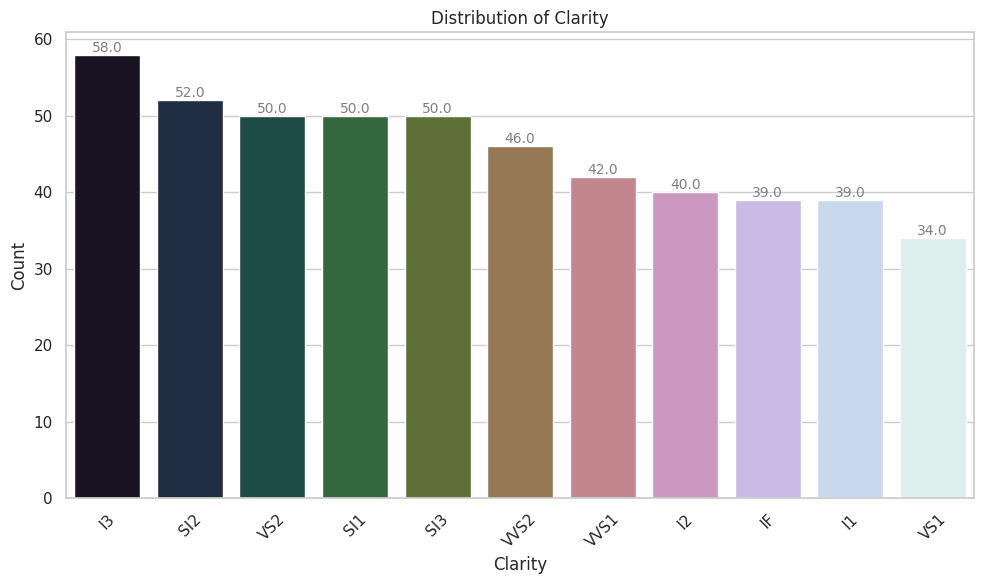

In [79]:
clarityDF = pd.DataFrame(clarity)

# Reset the index to have the intensity levels as a column
clarityDF.reset_index(inplace=True)
clarityDF.columns = ['Clarity', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a bar graph using seaborn with bar labels
plt.figure(figsize=(10, 6))
ax = sn.barplot(x='Clarity', y='Count', data=clarityDF, palette="cubehelix")
plt.xlabel('Clarity')
plt.ylabel('Count')
plt.title('Distribution of Clarity')

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 8) To show the cut percentages

In [80]:
cut = dataset['cut'].value_counts()
cutDF = pd.DataFrame(cut)
cutDF

,count
cut,
Very Good,121
Poor,110
Excellent,101
Fair,86
Good,82


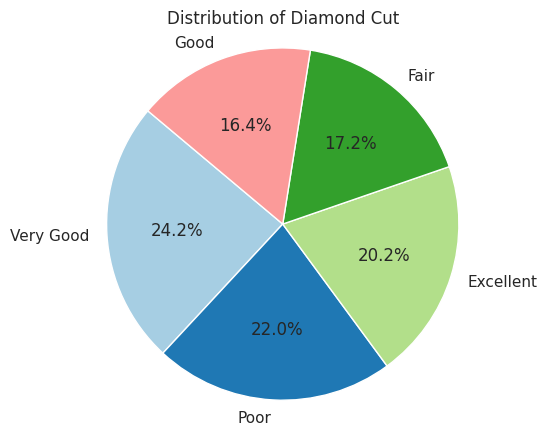

In [81]:
cutDF = pd.DataFrame(cut)

# Reset the index to have the cut categories as a column
cutDF.reset_index(inplace=True)
cutDF.columns = ['Cut', 'Count']

# Plotting a pie chart with percentage labels
plt.figure(figsize=(5, 5))
plt.pie(cutDF['Count'], labels=cutDF['Cut'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Diamond Cut')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### 9) To show symmetry distribution

In [82]:
symmetry = dataset['symmetry'].value_counts()
symmetryDF = pd.DataFrame(symmetry)
symmetryDF

,count
symmetry,
Very Good,115
Fair,103
Good,98
Poor,94
Excellent,90


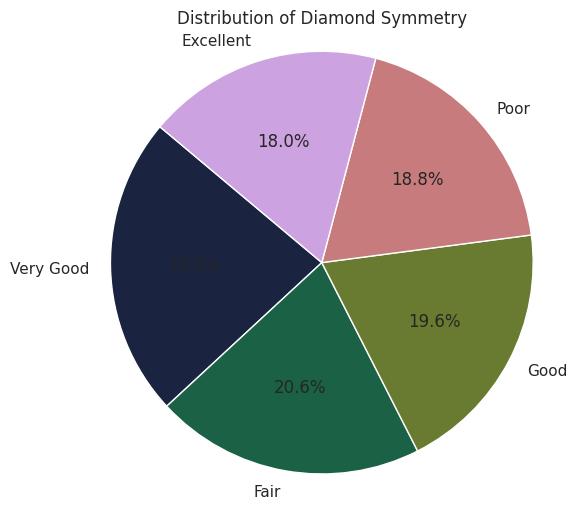

In [83]:
symmetryDF = pd.DataFrame(symmetry)

# Reset the index to have the symmetry categories as a column
symmetryDF.reset_index(inplace=True)
symmetryDF.columns = ['Symmetry', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a pie chart using seaborn with percentage labels
plt.figure(figsize=(6,6))
plt.pie(symmetryDF['Count'], labels=symmetryDF['Symmetry'], autopct='%1.1f%%', startangle=140, colors=sn.color_palette("cubehelix"))
plt.title('Distribution of Diamond Symmetry')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### 10) To show polish distribution

In [84]:
polish = dataset['polish'].value_counts()
polishDF = pd.DataFrame(polish)
polishDF

,count
polish,
Excellent,120
Very Good,107
Poor,102
Fair,92
Good,79


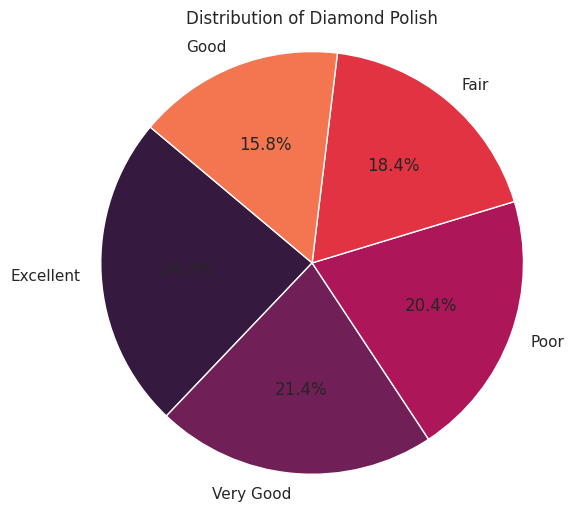

In [85]:
polishDF = pd.DataFrame(polish)

# Reset the index to have the symmetry categories as a column
polishDF.reset_index(inplace=True)
polishDF.columns = ['polish', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a pie chart using seaborn with percentage labels
plt.figure(figsize=(6,6))
plt.pie(polishDF['Count'], labels=polishDF['polish'], autopct='%1.1f%%', startangle=140, colors=sn.color_palette("rocket"))
plt.title('Distribution of Diamond Polish')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### 11) To show culet_size distribution

In [86]:
culet = dataset['culet_size'].value_counts()
culetDF = pd.DataFrame(culet)
culetDF

,count
culet_size,
SL,69
VL,67
N,66
M,65
S,64
VS,62
EL,59
L,48


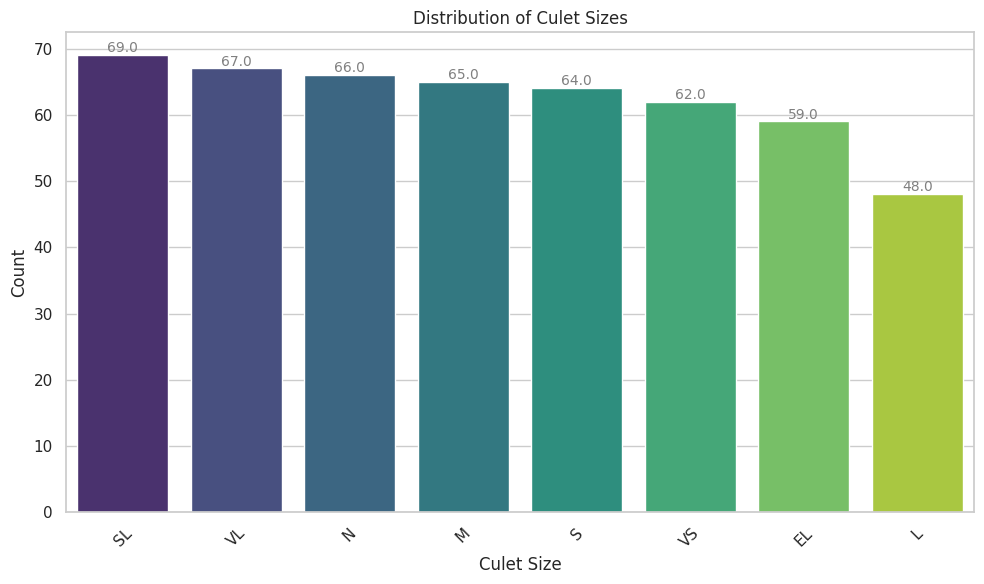

In [87]:
culetDF = pd.DataFrame(culet)

# Reset the index to have the culet sizes as a column
culetDF.reset_index(inplace=True)
culetDF.columns = ['Culet Size', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a bar graph using seaborn with bar labels
plt.figure(figsize=(10, 6))
ax = sn.barplot(x='Culet Size', y='Count', data=culetDF, palette="viridis")
plt.xlabel('Culet Size')
plt.ylabel('Count')
plt.title('Distribution of Culet Sizes')

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 12) To show culet_condition distribution

In [88]:
culet = dataset['culet_condition'].value_counts()
culetDF = pd.DataFrame(culet)
culetDF

,count
culet_condition,
Blue,114
Yellow,108
White,97
Green,96
Orange,85


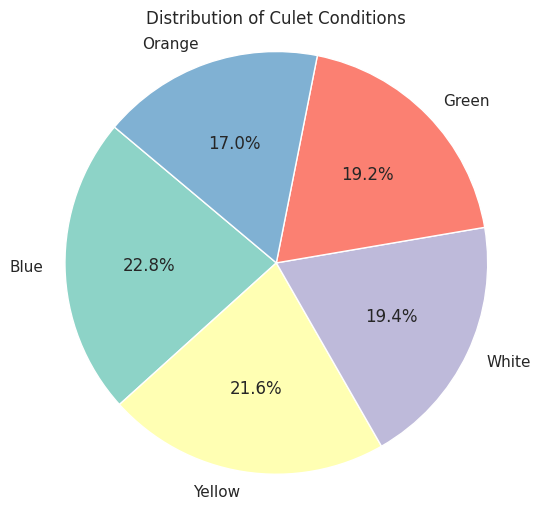

In [89]:
culetDF = pd.DataFrame(culet)

# Reset the index to have the culet conditions as a column
culetDF.reset_index(inplace=True)
culetDF.columns = ['Culet Condition', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a pie chart using seaborn with percentage labels
plt.figure(figsize=(6,6))
plt.pie(culetDF['Count'], labels=culetDF['Culet Condition'], autopct='%1.1f%%', startangle=140, colors=sn.color_palette("Set3"))
plt.title('Distribution of Culet Conditions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### 13) To show fluor_intensity distribution

In [90]:
fluor = dataset['fluor_intensity'].value_counts()
fluorDF = pd.DataFrame(fluor)
fluorDF

,count
fluor_intensity,
Very Slight,96
Slight,91
Faint,85
Very Strong,85
Strong,80
Medium,63


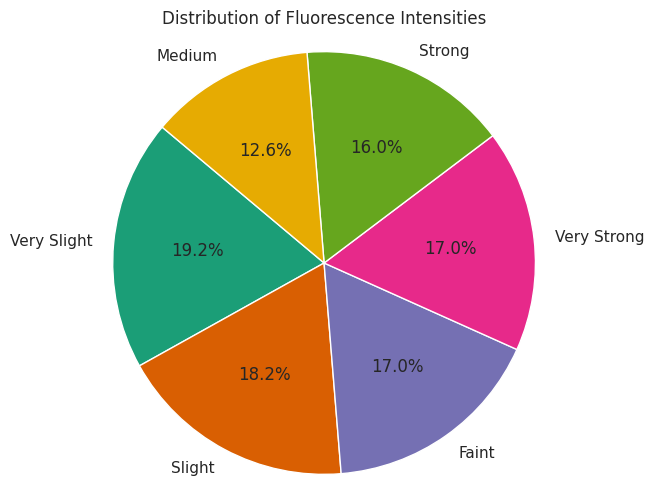

In [91]:
fluorDF = pd.DataFrame(fluor)

# Reset the index to have the fluorescence intensities as a column
fluorDF.reset_index(inplace=True)
fluorDF.columns = ['Fluorescence Intensity', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a pie chart using seaborn with percentage labels
plt.figure(figsize=(6,6))
plt.pie(fluorDF['Count'], labels=fluorDF['Fluorescence Intensity'], autopct='%1.1f%%', startangle=140, colors=sn.color_palette("Dark2"))
plt.title('Distribution of Fluorescence Intensities')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### 14) To show the count of labs

In [92]:
lab = dataset['lab'].value_counts()
labDF = pd.DataFrame(lab)
labDF

,count
lab,
IGI,180
HRD,174
GIA,146


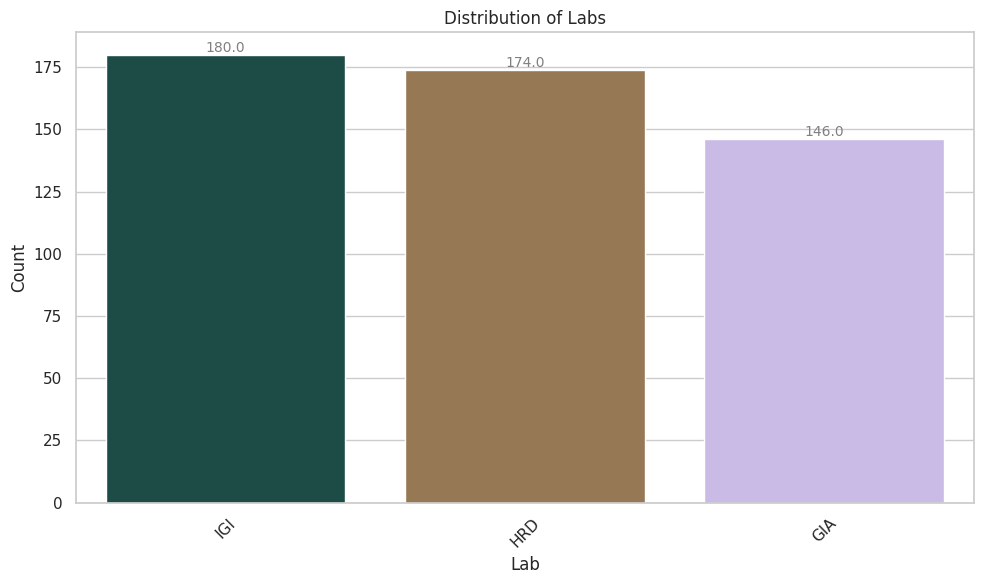

In [93]:
labDF = pd.DataFrame(lab)

# Reset the index to have the lab values as a column
labDF.reset_index(inplace=True)
labDF.columns = ['Lab', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a bar graph using seaborn with bar labels
plt.figure(figsize=(10, 6))
ax = sn.barplot(x='Lab', y='Count', data=labDF, palette="cubehelix")
plt.xlabel('Lab')
plt.ylabel('Count')
plt.title('Distribution of Labs')

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 15) To show eye_clean distribution

In [94]:
eye = dataset['eye_clean'].value_counts()
eyeDF = pd.DataFrame(eye)
eyeDF

,count
eye_clean,
E1,132
No,126
Borderline,122
Yes,120


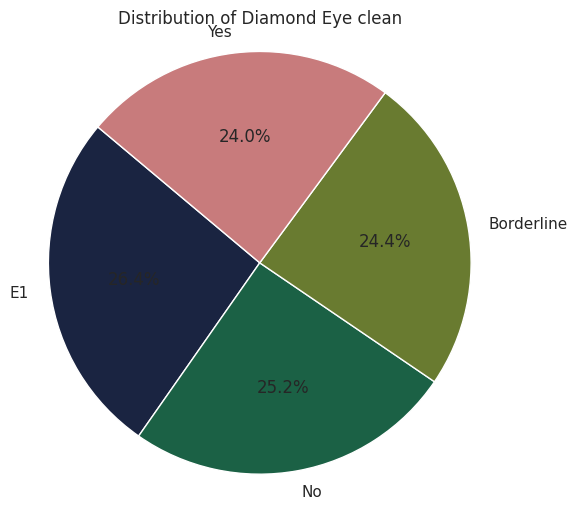

In [95]:
eyeDF = pd.DataFrame(eye)

# Reset the index to have the symmetry categories as a column
eyeDF.reset_index(inplace=True)
eyeDF.columns = ['Eye_Clean', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a pie chart using seaborn with percentage labels
plt.figure(figsize=(6,6))
plt.pie(eyeDF['Count'], labels=eyeDF['Eye_Clean'], autopct='%1.1f%%', startangle=140, colors=sn.color_palette("cubehelix"))
plt.title('Distribution of Diamond Eye clean')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### 16) To find the year on year total sales

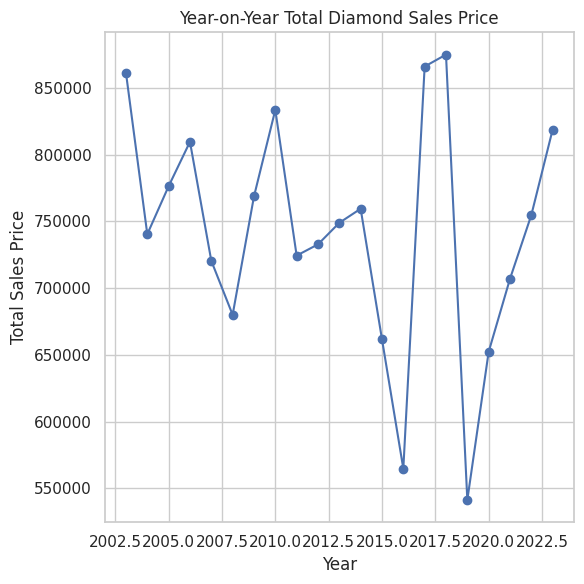

In [96]:
dataset['date'] = pd.to_datetime(dataset['date'])

# Extract year from the date
dataset['year'] = dataset['date'].dt.year

# Group by year and calculate the total sales price for each year
yearly_sales = dataset.groupby('year')['total_sales_price'].mean()

# Plotting a line graph for year-on-year total sales price
plt.figure(figsize=(6, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Sales Price')
plt.title('Year-on-Year Total Diamond Sales Price')
plt.grid(True)
plt.tight_layout()
plt.show()



#### 17) To find month on month  total sales

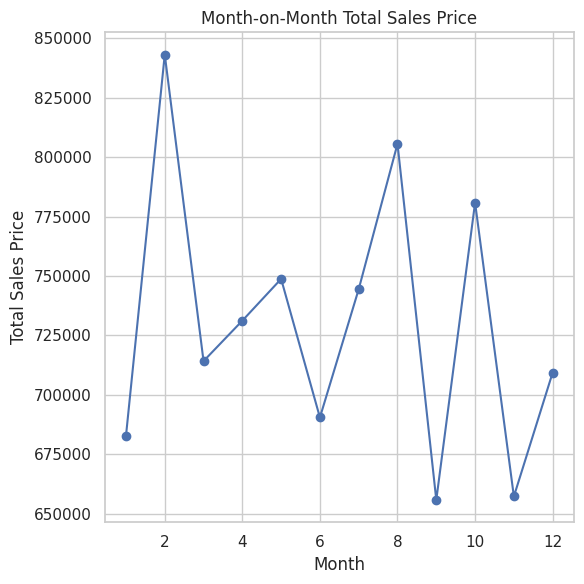

In [97]:
dataset['date'] = pd.to_datetime(dataset['date'])

# Extract year from the date
dataset['month'] = dataset['date'].dt.month

# Group by year and calculate the total sales price for each year
yearly_sales = dataset.groupby('month')['total_sales_price'].mean()

# Plotting a line graph for year-on-year total sales price
plt.figure(figsize=(6, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales Price')
plt.title('Month-on-Month Total Sales Price')
plt.grid(True)
plt.tight_layout()
plt.show()



#### 18) To find count of shapes generated by labs

In [98]:
dataset.groupby('lab')['shape'].value_counts()

lab  shape           
GIA  Cushion Modified    18
     Round               18
     Cushion             17
     Pear                16
     Marquise            15
     Emerald             13
     Asscher             12
     Heart               11
     Oval                10
     Princess             8
     Radiant              8
HRD  Heart               23
     Princess            21
     Radiant             18
     Marquise            17
     Pear                16
     Round               15
     Emerald             14
     Cushion Modified    14
     Cushion             13
     Oval                13
     Asscher             10
IGI  Princess            25
     Round               20
     Pear                19
     Oval                19
     Cushion Modified    17
     Emerald             16
     Asscher             15
     Heart               15
     Radiant             13
     Cushion             12
     Marquise             9
Name: count, dtype: int64

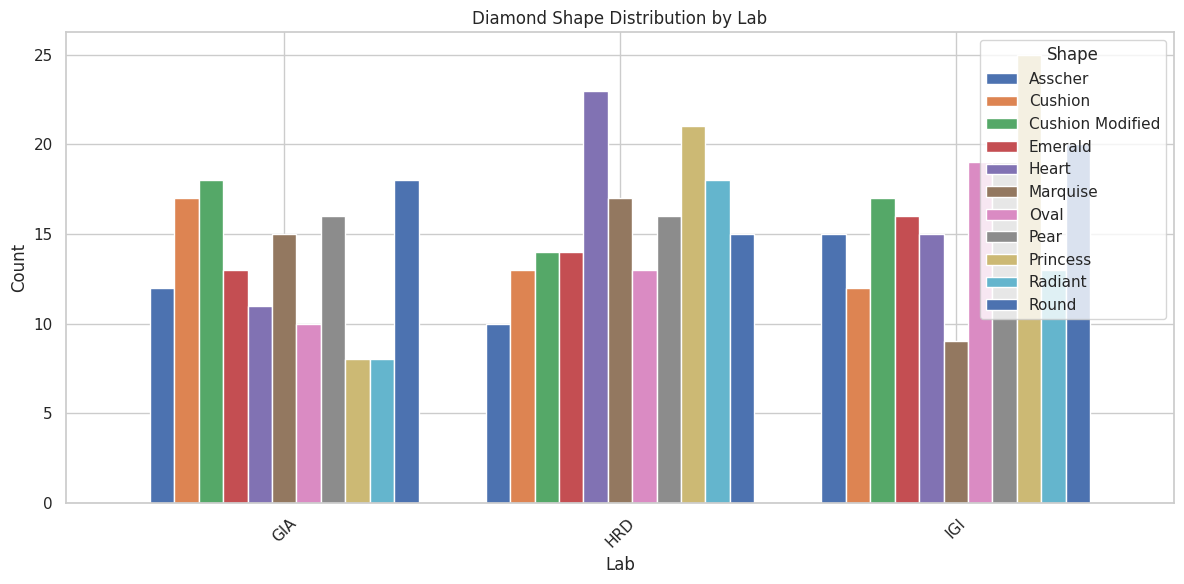

In [99]:
grouped_counts = dataset.groupby(['lab', 'shape']).size().unstack()

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a side-by-side bar chart using seaborn
plt.figure(figsize=(12, 6))
grouped_counts.plot(kind='bar', width=0.8, ax=plt.gca())
plt.xlabel('Lab')
plt.ylabel('Count')
plt.title('Diamond Shape Distribution by Lab')
plt.xticks(rotation=45)
plt.legend(title='Shape')
plt.tight_layout()
plt.show()

#### 19) To find size variations across the years

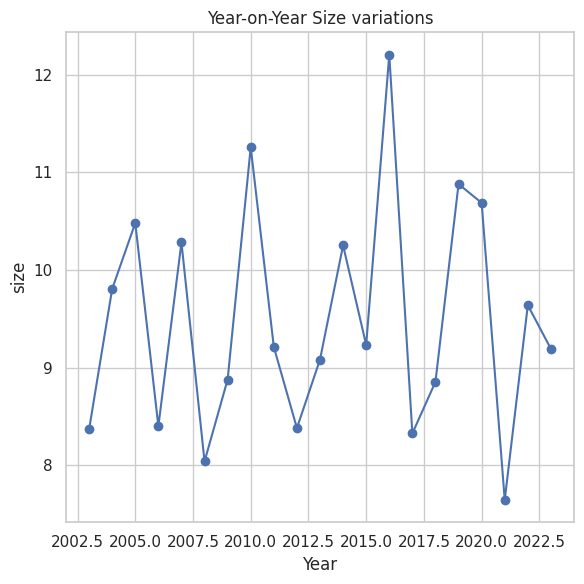

In [100]:
dataset['date'] = pd.to_datetime(dataset['date'])

# Extract year from the date
dataset['year'] = dataset['date'].dt.year

# Group by year and calculate the total sales price for each year
yearly_size = dataset.groupby('year')['size'].mean()

# Plotting a line graph for year-on-year total sales price
plt.figure(figsize=(6, 6))
plt.plot(yearly_size.index, yearly_size.values, marker='o')
plt.xlabel('Year')
plt.ylabel('size')
plt.title('Year-on-Year Size variations')
plt.grid(True)
plt.tight_layout()
plt.show()



#### 20) To find month on month size variations

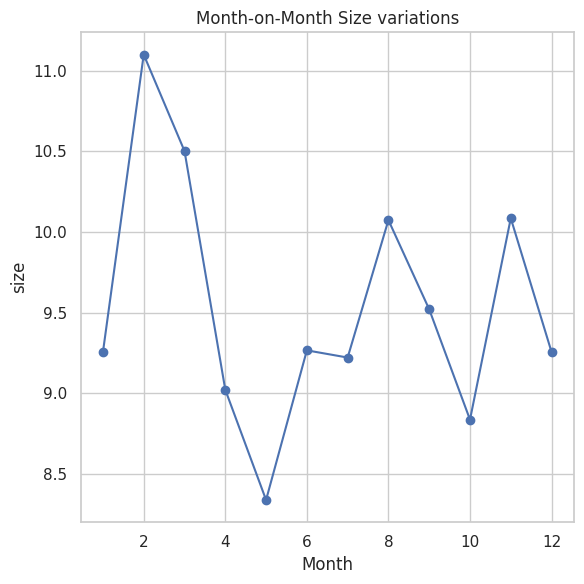

In [101]:
dataset['date'] = pd.to_datetime(dataset['date'])

# Extract year from the date
dataset['month'] = dataset['date'].dt.month

# Group by year and calculate the total sales price for each year
monthly_size = dataset.groupby('month')['size'].mean()

# Plotting a line graph for year-on-year total sales price
plt.figure(figsize=(6, 6))
plt.plot(monthly_size.index, monthly_size.values, marker='o')
plt.xlabel('Month')
plt.ylabel('size')
plt.title('Month-on-Month Size variations')
plt.grid(True)
plt.tight_layout()
plt.show()



#### 21) To show yearly variations in the cuts that were made

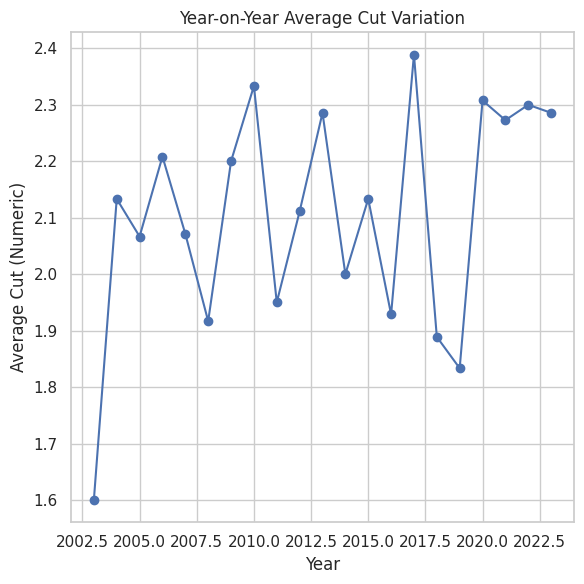

In [102]:
cut_mapping = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

# Convert the 'date' column to datetime format
dataset['date'] = pd.to_datetime(dataset['date'])

# Extract year from the date
dataset['year'] = dataset['date'].dt.year

# Map cut categories to numerical values
dataset['cut_numeric'] = dataset['cut'].map(cut_mapping)

# Group by year and calculate the average cut
yearly_avg_cut = dataset.groupby('year')['cut_numeric'].mean()

# Plotting a line graph for year-on-year average cut
plt.figure(figsize=(6, 6))
plt.plot(yearly_avg_cut.index, yearly_avg_cut.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Cut (Numeric)')
plt.title('Year-on-Year Average Cut Variation')
plt.grid(True)
plt.tight_layout()
plt.show()

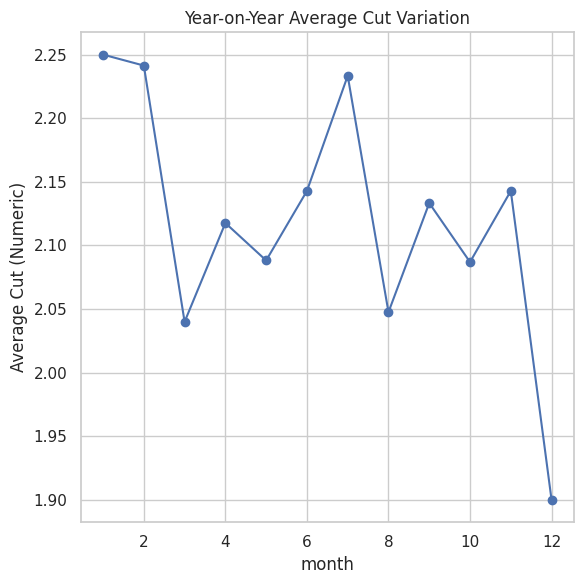

In [103]:
cut_mapping = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

# Convert the 'date' column to datetime format
dataset['date'] = pd.to_datetime(dataset['date'])

# Extract year from the date
dataset['month'] = dataset['date'].dt.month

# Map cut categories to numerical values
dataset['cut_numeric'] = dataset['cut'].map(cut_mapping)

# Group by year and calculate the average cut
yearly_avg_cut = dataset.groupby('month')['cut_numeric'].mean()

# Plotting a line graph for year-on-year average cut
plt.figure(figsize=(6, 6))
plt.plot(yearly_avg_cut.index, yearly_avg_cut.values, marker='o')
plt.xlabel('month')
plt.ylabel('Average Cut (Numeric)')
plt.title('Year-on-Year Average Cut Variation')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 22) To show the relation between culet_size and cut taken

In [104]:
cross_tab = pd.crosstab(dataset['culet_size'], dataset['cut'])

# Display the cross-tabulation table
cross_tabDF = pd.DataFrame(cross_tab)
cross_tabDF

cut,Excellent,Fair,Good,Poor,Very Good
culet_size,,,,,
EL,14,7,13,14,11
L,9,10,7,9,13
M,12,11,12,20,10
N,17,7,7,13,22
S,17,10,10,14,13
SL,12,11,8,16,22
VL,12,19,7,13,16
VS,8,11,18,11,14


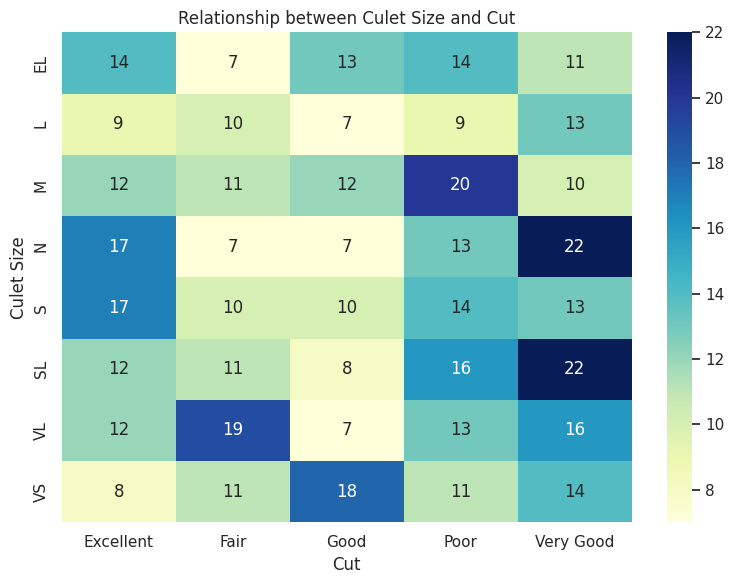

In [105]:
cross_tab = pd.crosstab(dataset['culet_size'], dataset['cut'])

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a heatmap using seaborn
plt.figure(figsize=(8, 6))
sn.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Cut')
plt.ylabel('Culet Size')
plt.title('Relationship between Culet Size and Cut')
plt.tight_layout()
plt.show()